In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms
from scipy.stats import shapiro, levene, ttest_ind

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Business problem

* Facebook recently introduced a new bidding type, 'average bidding', as an alternative to the existing bidding type called 'maximum bidding'.
* One of our clients, bombabomba.com, decided to test this new feature and would like to run an A/B test to see if average bidding converts more than maximum bidding.
* The A/B test has been going on for 1 month and bombabomba.com is now waiting for you to analyze the results of this A/B test. 
* The ultimate success criterion for Bombabomba.com is Purchase. 
* Therefore, the focus should be on the Purchase metric for statistical testing.

# Dataset Story
* In this data set, which includes the website information of a company, there is information such as the number of advertisements that users see and click, as well as earnings information from here. 
* There are two separate data sets, the control and test groups. 
* These datasets are in separate sheets of the ab_testing.xlsx excel. 
* Maximum Bidding was applied to the control group and Average Bidding was applied to the test group.

### Explanation of the variables in the dataset

* Impression:     Number of ad views
* Click:          Number of clicks on the displayed ad
* Purchase:       The number of products purchased after the ads clicked
* Earning:        Earnings after purchased products

## Task 1: Preparing and Analyzing Data

### Step 1: Read the dataset ab_testing_data.xlsx consisting of control and test group data. Assign control and test group data to separate variables.

In [2]:
df_control = pd.read_excel('/kaggle/input/ab-testing-purchase/ab_testing.xlsx', sheet_name='Control Group')
df_test = pd.read_excel('/kaggle/input/ab-testing-purchase/ab_testing.xlsx', sheet_name='Test Group')

In [3]:
df_control.head()

,Impression,Click,Purchase,Earning
0,82529.459,6090.077,665.211,2311.277
1,98050.452,3382.862,315.085,1742.807
2,82696.024,4167.966,458.084,1797.827
3,109914.400,4910.882,487.091,1696.229
4,108457.763,5987.656,441.034,1543.720


In [4]:
df_test.head()

,Impression,Click,Purchase,Earning
0,120103.504,3216.548,702.160,1939.611
1,134775.943,3635.082,834.054,2929.406
2,107806.621,3057.144,422.934,2526.245
3,116445.276,4650.474,429.034,2281.429
4,145082.517,5201.388,749.860,2781.698


### Step 2: Analyze control and test group data.

In [5]:
# descriptive statistics
def descriptive_statistics(dataframe):
    quantiles = [0.05, 0.1, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]
    return dataframe.describe(quantiles).T

In [6]:
datasets = [df_control, df_test]
for col in datasets:
    display(descriptive_statistics(col))

,count,mean,std,min,5%,10%,25%,50%,75%,90%,95%,99%,max
Impression,40.000,101711.449,20302.158,45475.943,79412.018,81711.120,85726.690,99790.701,115212.817,129438.443,132950.532,143105.791,147539.336
Click,40.000,5100.657,1329.985,2189.753,3367.484,3582.087,4124.304,5001.221,5923.804,7010.163,7374.361,7761.795,7959.125
Purchase,40.000,550.894,134.108,267.029,328.662,381.993,470.096,531.206,637.957,740.182,748.271,790.188,801.795
Earning,40.000,1908.568,302.918,1253.990,1329.577,1569.056,1685.847,1975.161,2119.803,2254.805,2318.528,2481.309,2497.295


,count,mean,std,min,5%,10%,25%,50%,75%,90%,95%,99%,max
Impression,40.000,120512.412,18807.449,79033.835,83150.504,97389.767,112691.971,119291.301,132050.579,141739.315,153178.691,158245.264,158605.920
Click,40.000,3967.550,923.095,1836.630,2600.361,2917.265,3376.819,3931.360,4660.498,5074.011,5271.187,6012.877,6019.695
Purchase,40.000,582.106,161.153,311.630,356.695,381.055,444.627,551.356,699.862,823.745,854.209,876.576,889.910
Earning,40.000,2514.891,282.731,1939.611,2080.976,2186.392,2280.537,2544.666,2761.545,2813.611,2931.311,3091.941,3171.490


* The mean and median valeus were all close to each other. 
* Therefore, we can say that the distributions of the variables are normal and there are no outliers, except for the Impresions for the df_test.
* We can validate this using the following defined function named 'determining_outliers'. 

In [7]:
# showing boxplots and histograms to determine outliers for each dataframe
def determining_outliers(dataframe, variable):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=dataframe[variable])
    plt.subplot(1, 2, 2)
    sns.histplot(x = dataframe[variable])
    plt.show(block=True)

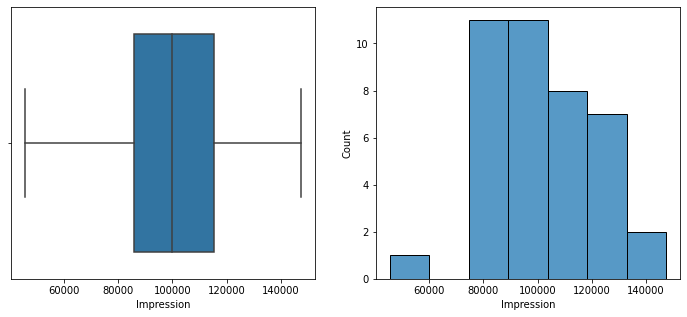

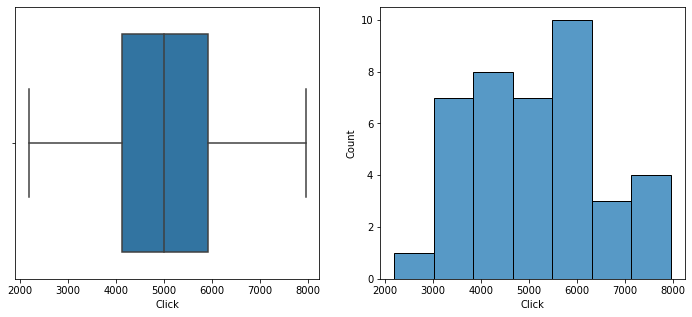

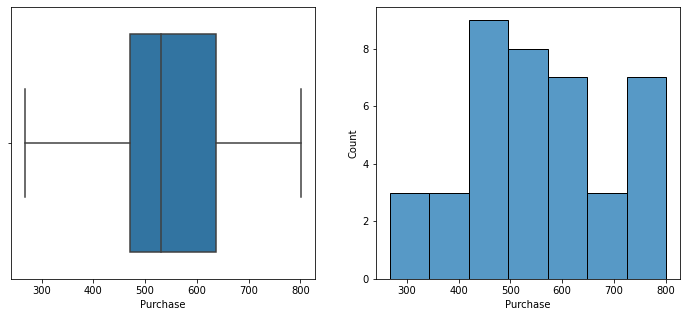

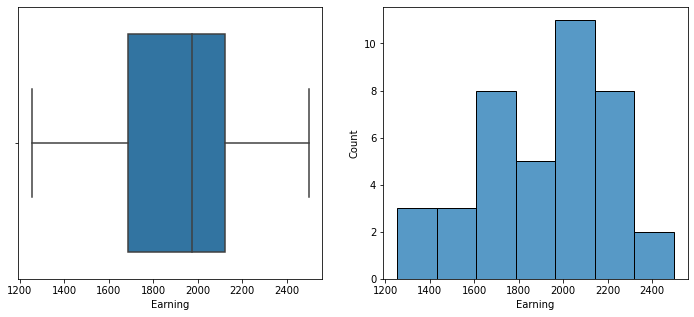

In [8]:
# indicating the boxplots and histograms for the df_control
for col in df_control.columns:
    determining_outliers(df_control, col)

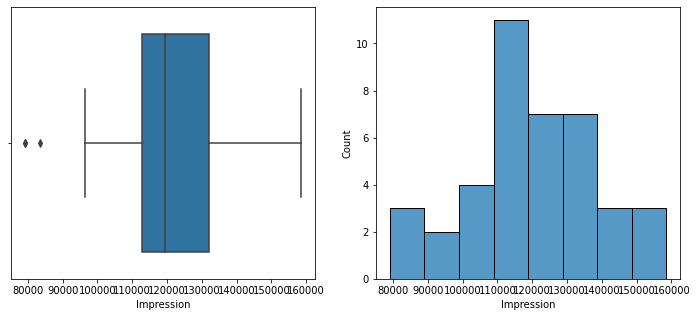

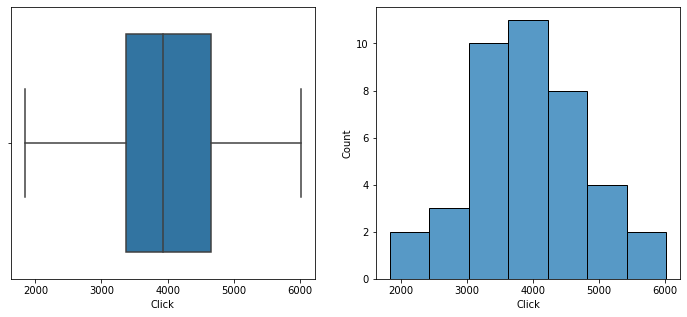

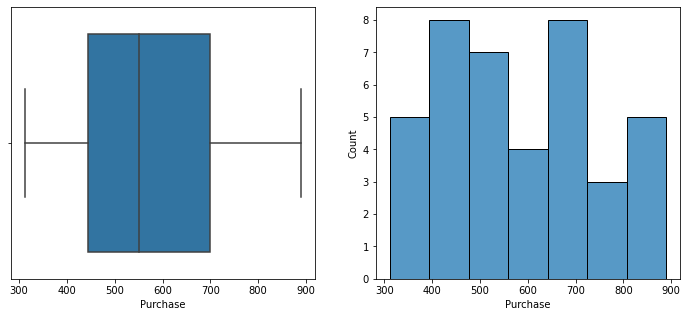

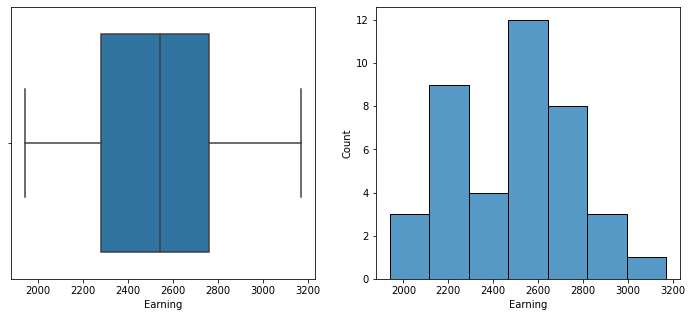

In [9]:
# indicating the boxplots and histograms for the df_test
for col in df_test.columns:
    determining_outliers(df_test, col)

* Based on the boxplot and histogram results, there are also no outliers, except for the Impresions for the df_test.

In [10]:
# determining the confidence ranges
def confidence_range(dataframe, variable):
    return sms.DescrStatsW(dataframe[variable]).tconfint_mean()

In [11]:
# determining the confidence ranges for the df_control
for col in df_control.columns:
    print(col, confidence_range(df_control, col))

Impression (95218.50401213673, 108204.39412325788)
Click (4675.307376598384, 5526.007368556174)
Purchase (508.0041754264924, 593.7839421139709)
Earning (1811.6904932901255, 2005.4461063153728)


In [12]:
# determining the confidence ranges for the df_test
for col in df_control.columns:
    print(col, confidence_range(df_test, col))

Impression (114497.4978773465, 126527.32563772256)
Click (3672.3296353187875, 4262.769886293253)
Purchase (530.5670226990062, 633.6451705979289)
Earning (2424.469019772786, 2605.3124455284496)


* These values mean: In case of sampling 100 times and taking the average, the average value will be between these two values in 95% of them and the 5% margin of error will be outside this range.

In [13]:
# regression plot and correlation analysis
def regression_plot(dataframe, variable_1, variable_2):
    sns.regplot(x=variable_1, y=variable_2, data=dataframe)
    plt.show(block=True)

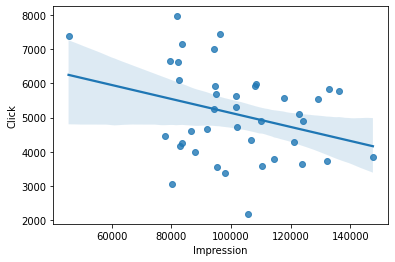

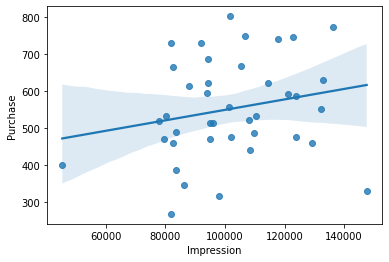

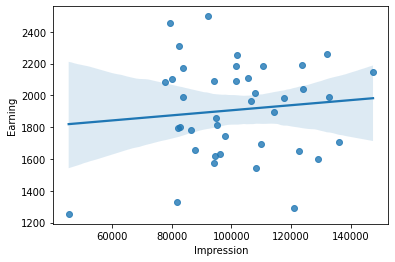

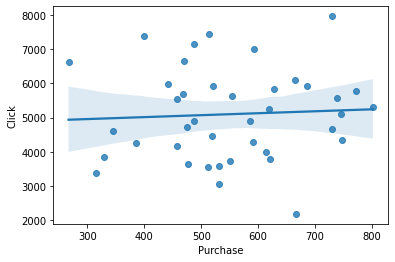

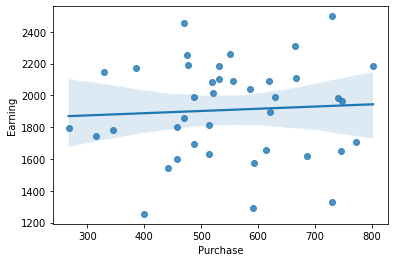

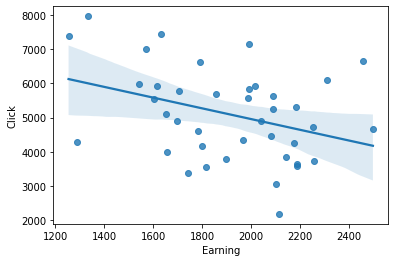

In [14]:
# for the dataframe df_control
regression_plot(df_control, 'Impression', 'Click')      # when impression increases, the clicked amount decreases. there is a negative correlation 
regression_plot(df_control, 'Impression', 'Purchase')   # when impression increases, the purchase increases. there is a relatively high positive correlation 
regression_plot(df_control, 'Impression', 'Earning')    # when impression increases, the earning increases. there is a weak positive correlation
regression_plot(df_control, 'Purchase', 'Click')        # when purchase increases, the click did not increase. we can say that there is no correlation
regression_plot(df_control, 'Purchase', 'Earning')      # when purchase increases, the earning did not increase. we can say that there is no correlation
regression_plot(df_control, 'Earning', 'Click')         # when earning increases, the click decreases. there is a relatively low neagtive correlation

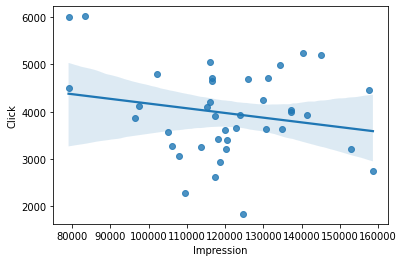

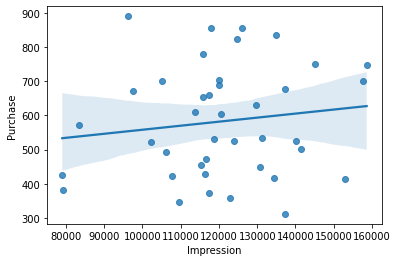

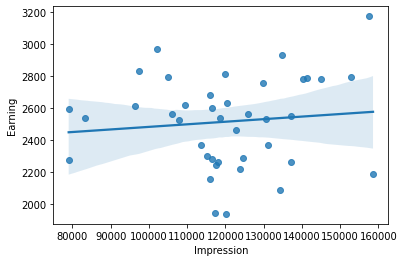

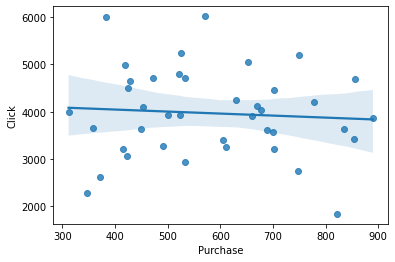

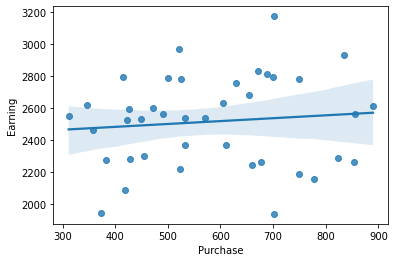

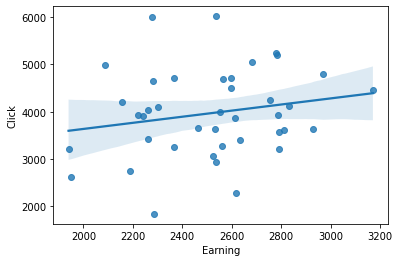

In [15]:
# for the dataframe df_test
regression_plot(df_test, 'Impression', 'Click')      # when impression increases, the clicked amount decreases. there is a weak negative correlation 
regression_plot(df_test, 'Impression', 'Purchase')   # when impression increases, the purchase increases. there is a weak positive correlation 
regression_plot(df_test, 'Impression', 'Earning')    # when impression increases, the earning increases. there is a weak positive correlation
regression_plot(df_test, 'Purchase', 'Click')        # when purchase increases, the click did not increase. we can say that there is no correlation
regression_plot(df_test, 'Purchase', 'Earning')      # when purchase increases, the earning increases a bit. we can say that there is a weak positive correlation
regression_plot(df_test, 'Earning', 'Click')         # when earning increases, the click also increases. there is a weak positive correlation

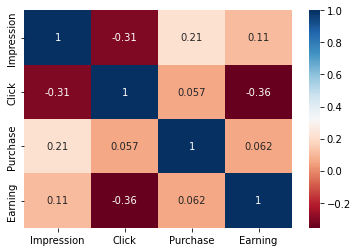

In [16]:
# showing heat map
sns.heatmap(df_control.corr(), cmap='RdBu', annot=True)
plt.show(block=True)

### Step 3: After the analysis process, combine the control and test group data using the concat method.

In [17]:
# converting lower case the col names of the dataframe
def lower_col_names(dataframe):
    dataframe.columns = [col.lower() for col in dataframe.columns]
    return dataframe

for col in [df_control, df_test]:
    lower_col_names(col)

In [18]:
df_control.head()

,impression,click,purchase,earning
0,82529.459,6090.077,665.211,2311.277
1,98050.452,3382.862,315.085,1742.807
2,82696.024,4167.966,458.084,1797.827
3,109914.400,4910.882,487.091,1696.229
4,108457.763,5987.656,441.034,1543.720


In [19]:
df_test.head()

,impression,click,purchase,earning
0,120103.504,3216.548,702.160,1939.611
1,134775.943,3635.082,834.054,2929.406
2,107806.621,3057.144,422.934,2526.245
3,116445.276,4650.474,429.034,2281.429
4,145082.517,5201.388,749.860,2781.698


In [20]:
# combining the dataframes with new column names
df_control.columns = ['impression_control', 'click_control', 'purchase_control', 'earning_control']
df_test.columns = ['impression_test', 'click_test', 'purchase_test', 'earning_test']
df = pd.concat([df_control, df_test], axis=1)
df.head()

,impression_control,click_control,purchase_control,earning_control,impression_test,click_test,purchase_test,earning_test
0,82529.459,6090.077,665.211,2311.277,120103.504,3216.548,702.160,1939.611
1,98050.452,3382.862,315.085,1742.807,134775.943,3635.082,834.054,2929.406
2,82696.024,4167.966,458.084,1797.827,107806.621,3057.144,422.934,2526.245
3,109914.400,4910.882,487.091,1696.229,116445.276,4650.474,429.034,2281.429
4,108457.763,5987.656,441.034,1543.720,145082.517,5201.388,749.860,2781.698


## Task 2: Defining the Hypothesis of A/B Testing

### Step 1: Define the hypothesis

* H0: M1 = M2   # there is no statistically significant difference between the mean purchase values of control and test groups.
* H1: M1!= M2   # there is a statistically significant difference between the mean purchase values of control and test groups.

### Step 2: Analyze the purchase (gain) averages for the control and test group.

In [21]:
def purchase_average(dataframe, variable):
    return round(dataframe[variable].mean(), 2)

purchase_columns = [col for col in df.columns if 'purchase' in col]
for col in purchase_columns:
    print(f'{col}_average: {purchase_average(df, col)}')

purchase_control_average: 550.89
purchase_test_average: 582.11


## Task 3: Performing Hypothesis Testing

### Step 1: Perform hypothesis checks before hypothesis testing.

* These are Assumption of Normality and Homogeneity of Variance.
* Test separately whether the control and test groups comply with the assumption of normality over the Purchase variable.

#### Normality Assumption:
* H0: Normal distribution assumption is provided.
* H1: Normal distribution assumption is not provided.
* If p<0.05, H0 is rejected, if p>0.05, H0 cannot be rejected
* Is the assumption of normality according to the test result provided for the control and test groups?
* Interpret the p-values obtained.

In [22]:
def normal_assumption(dataframe, variable):
    test_stat, pvalue = shapiro(dataframe[variable])
    return test_stat, pvalue

for col in purchase_columns:
    print(f'p-value_{col}: {round(normal_assumption(df, col)[1], 4)}')
    print(f'test_stat_{col}: {round(normal_assumption(df, col)[0], 4)}')

p-value_purchase_control: 0.5891
test_stat_purchase_control: 0.9773
p-value_purchase_test: 0.1541
test_stat_purchase_test: 0.9589


* Since p-values of both purchase_control and purchase_test are higher than 0.05, Ho hypothesis can not rejected.
* Therefore, the normal distribution is provided and there is no statistically significant difference between the values of both purchases

#### Variance Homogeneity:
* H0: Variances are homogeneous.
* H1: Variances are not homogeneous.
* If p<0.05, H0 is rejected, if p>0.05, H0 cannot be rejected
* Test whether the homogeneity of variance is provided for the control and test groups over the Purchase variable.
* Is the assumption of normality provided according to the test result?
* Interpret the p-values obtained.

In [23]:
def variance_homogenity(dataframe, variable1, variable2):
    test_stat, pvalue = levene(dataframe[variable1],
                            dataframe[variable2])
    return test_stat, pvalue

test_stat, pvalue = variance_homogenity(df, 'purchase_control', 'purchase_test')
print(f'Test Stat: {round(test_stat, 4)} and p-value: {round(pvalue, 4)}')

Test Stat: 2.6393 and p-value: 0.1083


* Since p-value=0.1083>0.05, Ho hypothesis can not rejected.
* Therefore, the variance homogenity assumption is provided and there is no statistically significant difference between the mean values of both purchases

### Step 2: Select the appropriate test according to the Normality Assumption and Variance Homogeneity results.

* Because, the normal and variance homogenity distributions are ensured, the parametric hypothesis is applied.

### Step 3: Considering the p_value obtained as a result of the test, interpret whether there is a statistically significant difference between the purchasing averages of the control and test groups.

In [24]:
def parametric_test(dataframe, variable1, variable2):
    test_stat, pvalue = ttest_ind(
        dataframe[variable1],
        dataframe[variable2],
        equal_var=True)
    return test_stat, pvalue

test_stat, pvalue = parametric_test(df, 'purchase_control', 'purchase_test')
print(f'Test Stat: {round(test_stat, 4)} and p-value: {round(pvalue, 4)}')

Test Stat: -0.9416 and p-value: 0.3493


* Test Stat: -0.9416 and p-value: 0.3493
* Since p-value=0.3493>0.05, H0 hypothesis can not rejected.
* Therefore, there is no statistically significant difference between the mean values of purchase_control and purchase_test.
* The difference between mean values is a chance. 

## Task 4: Analysis of Results

### Step 1: Which test did you use, state the reasons.

#### **In this project, H0 and H1 hypotheses called that show there is no significant difference between the mean values of the purchase variables or not were defined. Subsequently, the normal and variance homogeneity distribution were determined using the Shapiro-Wilks and Levene methods to specify whether the distribution is normal, respectively. It was understood that the distribution was normal and thus the parametric hypothesis test was applied to analyze whether there are any differences between the mean values of purchase_control and purchase_test.Accordingly, it was found that there are no differences between the average values of purchase_control and purchase_test (p>0.05).**

### Step 2: Advise the customer according to the test results you have obtained.

#### **It was revealed that the change in the purchase variable that was determined as a success criterion is not statistically considerable (p>0.05). Therefore, I suggest that the data we have are not enough to show any difference between their mean values and we need more time.  When we have more data, we can perform the AB testing again. But, in its current form, it was determined that the purchase_test has no advantage in the interest of the company in point of scientific meaning.**